### Sound Level Metrics Distributions

Here we will explore the distribution of ocean sound levels from a hydrophone recording. We will access data from the [Sanctuary Soundscape Monitoring Project](https://sanctsound.ioos.us/) which is publicly available through the [NOAA NCEI Passive Acoustics Archive](https://www.ncei.noaa.gov/products/passive-acoustic-data). We will use a dataset of computed broadband sound levels at 1 hour intervals.  

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
sound_levels = pd.read_csv("https://storage.googleapis.com/noaa-passive-bioacoustic/sanctsound/products/sound_level_metrics/oc03/sanctsound_oc03_02_bb_1h/data/SanctSound_OC03_02_BB_1h.csv")

In [12]:
# summary statistics of the dataset
sound_levels.describe()

,BB_20-24000
count,3003.000000
mean,103.586356
std,7.508545
min,85.349354
25%,98.694873
50%,103.723633
75%,108.123486
max,134.773183


### Histogram

array([[<Axes: title={'center': ' BB_20-24000 '}>]], dtype=object)

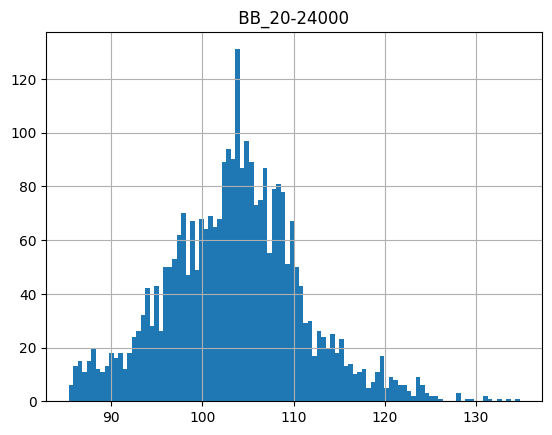

In [13]:
sound_levels.hist(bins=100)

* We observe that the range of the values is approximately (85 dB, 135 dB). Note, since those are average over 1 hour windows, the actual observed values can fall outside this range.

* We also obseve that the distribution looks skewed which is typical for sound level distributions. The upper tail is long, which corresponds to rare observations of loud sounds.

## Computing Empirical Probability

The histogram allows us to estimate the probability for a particular interval.

Exercise: compute the probability for the event **sound levels > 120**.

In [14]:
# note the BB_20-24000 column name has spaces around it!
# let's calculate the proportion of the values

sum(sound_levels[" BB_20-24000 "]>120)/len(sound_levels)

0.024642024642024644

Text(0.5, 1.0, 'Sound Level Histogram')

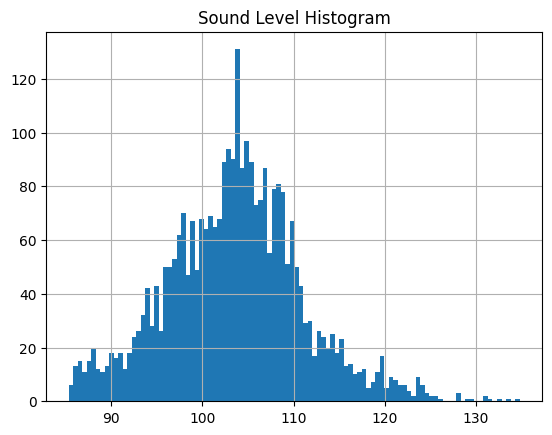

In [15]:
h = sound_levels[' BB_20-24000 '].hist(bins=100)
plt.title("Sound Level Histogram")

Text(0.5, 1.0, 'Sound Level Normalized Histogram')

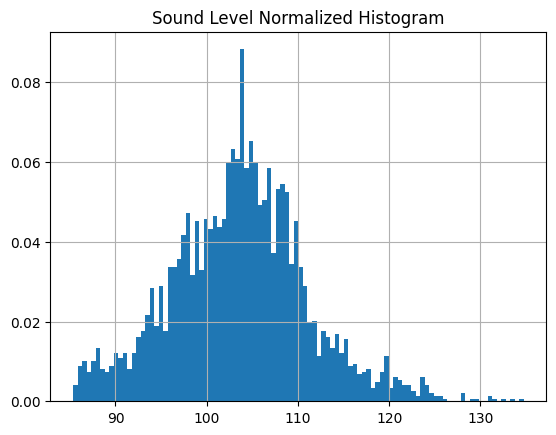

In [16]:
h = sound_levels[' BB_20-24000 '].hist(bins=100, density=True)
plt.title("Sound Level Normalized Histogram")

In [128]:
#ds = pd.read_csv("/content/sanctsound_products_sound_level_metrics_oc01_sanctsound_oc01_03_bb_1h_data_SanctSound_OC01_03_BB_1h.csv")

In [ ]:
ds[' BB_20-24000 '].hist(bins=100)

In [18]:
bound_lower = 100
bound_upper = 110

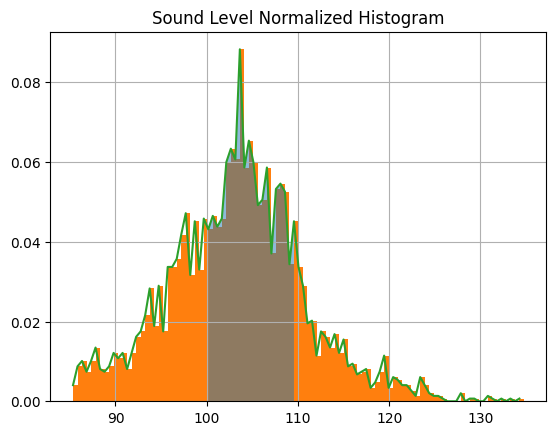

In [37]:
h = sound_levels[' BB_20-24000 '].hist(bins=100, density=True)
plt.title("Sound Level Normalized Histogram")
# plt.fill_betweenx(bound_lower, bound_upper)
h = plt.hist(sound_levels[' BB_20-24000 '].values, bins=100, density=True)
plt.plot(h[1][:-1], h[0],)
plt.fill_between(h[1][:-1], h[0], where=((h[1][:-1]>bound_lower) & (h[1][:-1]<bound_upper)), alpha=0.5)

In [56]:
from ipywidgets import interact
import ipywidgets as widgets

In [102]:
bound_slider = widgets.FloatRangeSlider(
    value=[min(sound_levels[' BB_20-24000 ']), max(sound_levels[' BB_20-24000 '])],
    min=min(sound_levels[' BB_20-24000 ']),
    max=max(sound_levels[' BB_20-24000 ']),
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',

)



In [124]:
def plot_probability(bounds):
  plt.title("Sound Level Normalized Histogram")
  h = plt.hist(sound_levels[' BB_20-24000 '].values, bins=100, density=True)
  plt.plot(h[1][:-1], h[0])
  plt.fill_between(h[1][:-1], h[0], where=((h[1][:-1]>bounds[0]) & (h[1][:-1]<bounds[1])), alpha=0.3, color='g')
  p = sum(h[0][(h[1][:-1]>bounds[0]) & (h[1][:-1]<bounds[1])])/sum(h[0])
  plt.title("Probability: {:.2f}".format(p))
  plt.show()


In [126]:
sum(h[0])

2.0233155144657053

In [127]:
out = interact(plot_probability, bounds=bound_slider)

interactive(children=(FloatRangeSlider(value=(91.04935, 103.24935), continuous_update=False, description='Test…